<a href="https://colab.research.google.com/github/a01685424/iayaa-Equipo-7/blob/main/S7_Actividad7_Equipo_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

**Equipo: 07**

* Alejandro Juárez Corona ---------------- A01168444
* Alberto Patraca Sotomayor	------------ A01793469
* Julio César Pérez Zapata --------------- A01793880
* Fernando Alfredo Rojas Estrella	----- A01685424
* Rodrigo Ruiz González -------------------- A01793081

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from google.colab import drive
from google.colab.data_table import DataTable
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, learning_curve, validation_curve, RepeatedKFold, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, classification_report, make_scorer
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
DataTable.max_columns = 100
DataTable.max_rows = 100
#warnings.filterwarnings('ignore')

#**Ejercicio-1.** 
##En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las mejores en el artículo antes citado: ‘Lifetime People who have liked a Page and engaged with a post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables que indican los autores en la Tabla 3 del artículo citado. 


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = '/content/drive/Shareddrives/Equipo 7 - IAyAA/Tarea Semana 7/dataset_Facebook.csv'
original_df = pd.read_csv(url, sep=';')
print(original_df.shape)
original_df.head()

(500, 19)


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
df = original_df.copy()
df = df.rename(columns={'Lifetime People who have liked your Page and engaged with your post': 'LPE'})
model_df = df[['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid', 'LPE']]
model_df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LPE
0,139441,Photo,2,12,4,3,0.0,119
1,139441,Status,2,12,3,10,0.0,1108
2,139441,Photo,3,12,3,3,0.0,132
3,139441,Photo,2,12,2,10,1.0,1386
4,139441,Photo,2,12,2,3,0.0,396


#**Ejercicio-2.**
##Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y validación. 


In [ ]:
y = model_df[['LPE']]
X = model_df.drop('LPE', axis=1)
Xtv, Xtest, ytv, ytest = train_test_split(X, y, train_size=0.8)
print(f'Tamaño del conjunto de entrada de entrenamiento-validación: {Xtv.shape}')
print(f'Tamaño del conjunto de entrada de prueba: {Xtest.shape}')
print(f'Tamaño del conjunto de salida de entrenamiento-validación: {ytv.shape}')
print(f'Tamaño del conjunto de salida de prueba: {ytest.shape}')

Tamaño del conjunto de entrada de entrenamiento-validación: (400, 7)
Tamaño del conjunto de entrada de prueba: (100, 7)
Tamaño del conjunto de salida de entrenamiento-validación: (400, 1)
Tamaño del conjunto de salida de prueba: (100, 1)


#**Ejercicio-3.**
##Definirás tus propias funciones de errores para este problema de regresión. Los errores que utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el error porcentual absoluto medio MAPE. 

In [ ]:
def rmse_compute(y_real, y_pred):
  rmse = 0
  for val, pred in zip(y_real, y_pred):
    rmse += np.square(val - pred)
  return (rmse/len(y_real))**(1/2)

def mae_compute(y_real, y_pred):
  mae = 0
  for val, pred in zip(y_real, y_pred):
    mae += np.abs(val - pred)
  return mae/len(y_real)

def mape_compute(y_real, y_pred):
  mape = 0
  for val, pred in zip(y_real, y_pred):
    mape += np.abs((val - pred)/val)
  return 100*mape/len(y_real)

#**Ejercicio-4.**

##En la página de la UCI, así como en el artículo de los autores previamente citado encuentras información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. Utiliza un Pipeline para evitar el filtrado de información. 

In [ ]:
# Funciones para entendimiento de los datos

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Busca_Nulos (data_frame): # Función que ayuda a identificar columnas con valores nulos
  if data_frame.isnull().values.any():          # Buscando nulos
    print('\n-------------------------------------\nEl data frame SÍ tiene nulos')     # Desechamos los valores NaN
    names_columns= data_frame.columns.values
    for name in names_columns:
      if data_frame[name].isnull().values.any():
        print('Se encuentran',data_frame[name].isnull().sum(),'nulos en la columna: ',name)
      else:
        None
  else:
    print('-------------------------------------\nEl data frame NO tiene nulos')
  print('-------------------------------------')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_hist(datos_, bins_): # Función que sirve para gráficar columnas del data frame
  nombres= datos_.columns
  n= len(nombres)
  print('-------------------------------------\n# de gráficos:',n)
  nr= int(n/5)+1
  round(nr,0)
  nc = int(n/nr)
  if nc== 0:
    nc= n
  else:
    if nr*nc<n:
      nc=nc+1
  print('Renglones:',nr,', columnas:',nc)  
  sns.set(rc={'figure.figsize':(nc*5,nr*5)})
  fig, axes = plt.subplots(nr,nc)
  plt.suptitle('Histogramas de los datos', y= 0.98, fontsize= 18, fontweight= "bold", 
               fontfamily= "serif", fontname= "Sans")
  k= 1
  for name in nombres:
    plt.subplot(nr,nc,k)  # Los nichos para cada histograma se numeran iniciando en 1.
    plt.hist(datos_[name], bins= bins_, color= 'green', density= True)
    plt.xlabel(name)
    plt.ylabel('Conteos')
    plt.title(name)
    plt.subplots_adjust(top=0.90)
    k= k+1
  plt.show()
  print('-------------------------------------')


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_histA(datos_, bins_): # Función que sirve para gráficar columnas del data frame 
  nombres= datos_.columns
  k= 1
  for name in nombres:
    sns.displot(datos_[name], color='green', bins= bins_, kde=True) #creamos el gráfico en Seaborn
    plt.xlabel(name)
    plt.ylabel('Conteos')
    plt.title(name)
    k= k+1
  plt.show()
  print('-------------------------------------')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_exploratorio(datos_): # Función que gráfica de forma exploratoria el data frame
  sns.pairplot(data = datos_, palette= 'bright')
  plt.show()
  print('-------------------------------------')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_mapa_de_calor(datos_):
  sns.heatmap(datos_.corr(), annot= True, cmap= "crest")
  plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


---
# Entendimiento de los datos:


-------------------------------------
El data frame SÍ tiene nulos
Se encuentran 1 nulos en la columna:  Paid
-------------------------------------
-------------------------------------
# de gráficos: 7
Renglones: 2 , columnas: 4


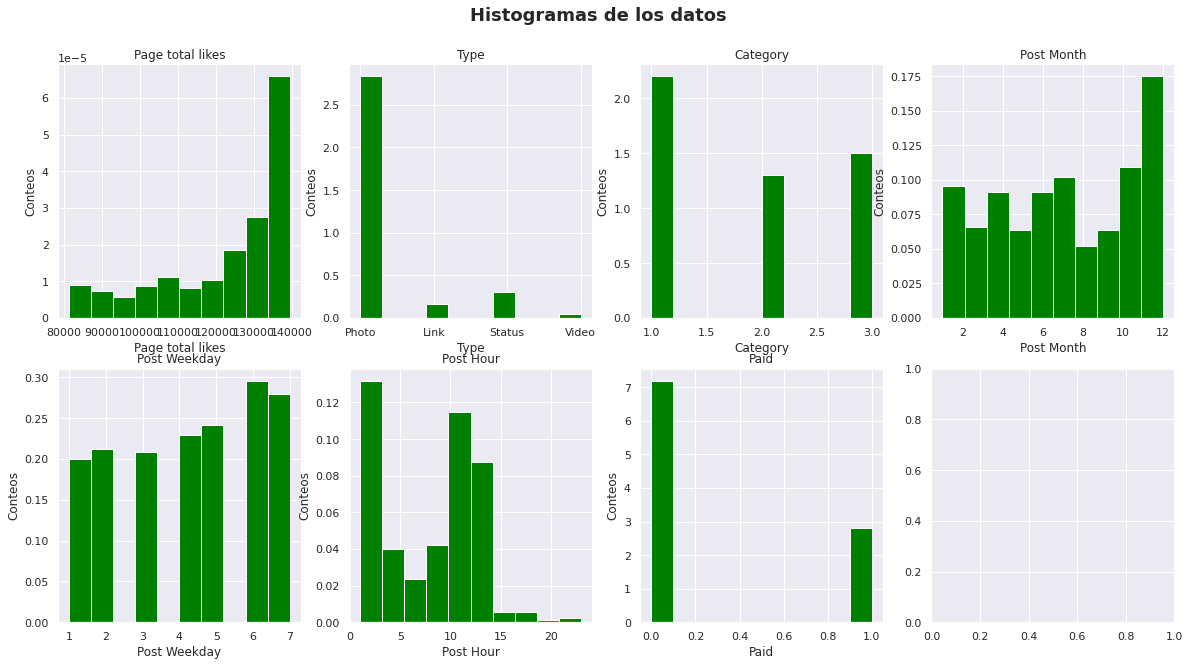

-------------------------------------


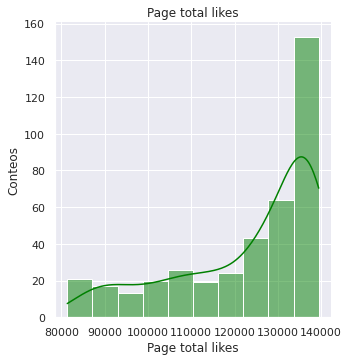

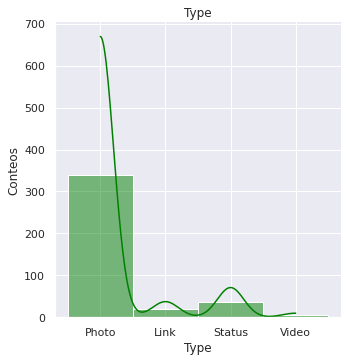

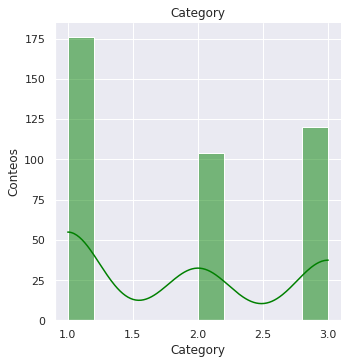

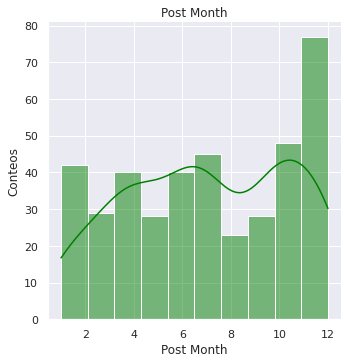

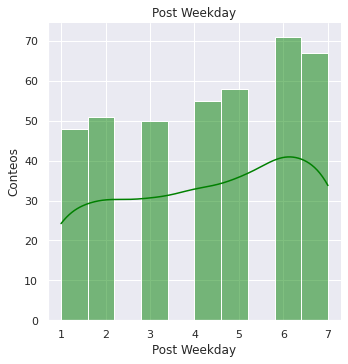

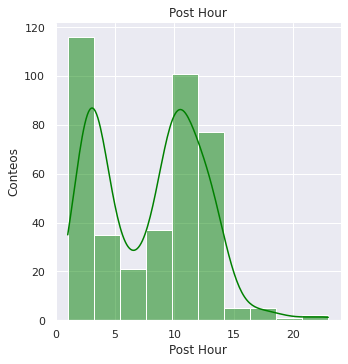

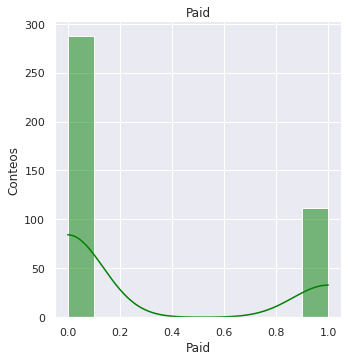

-------------------------------------


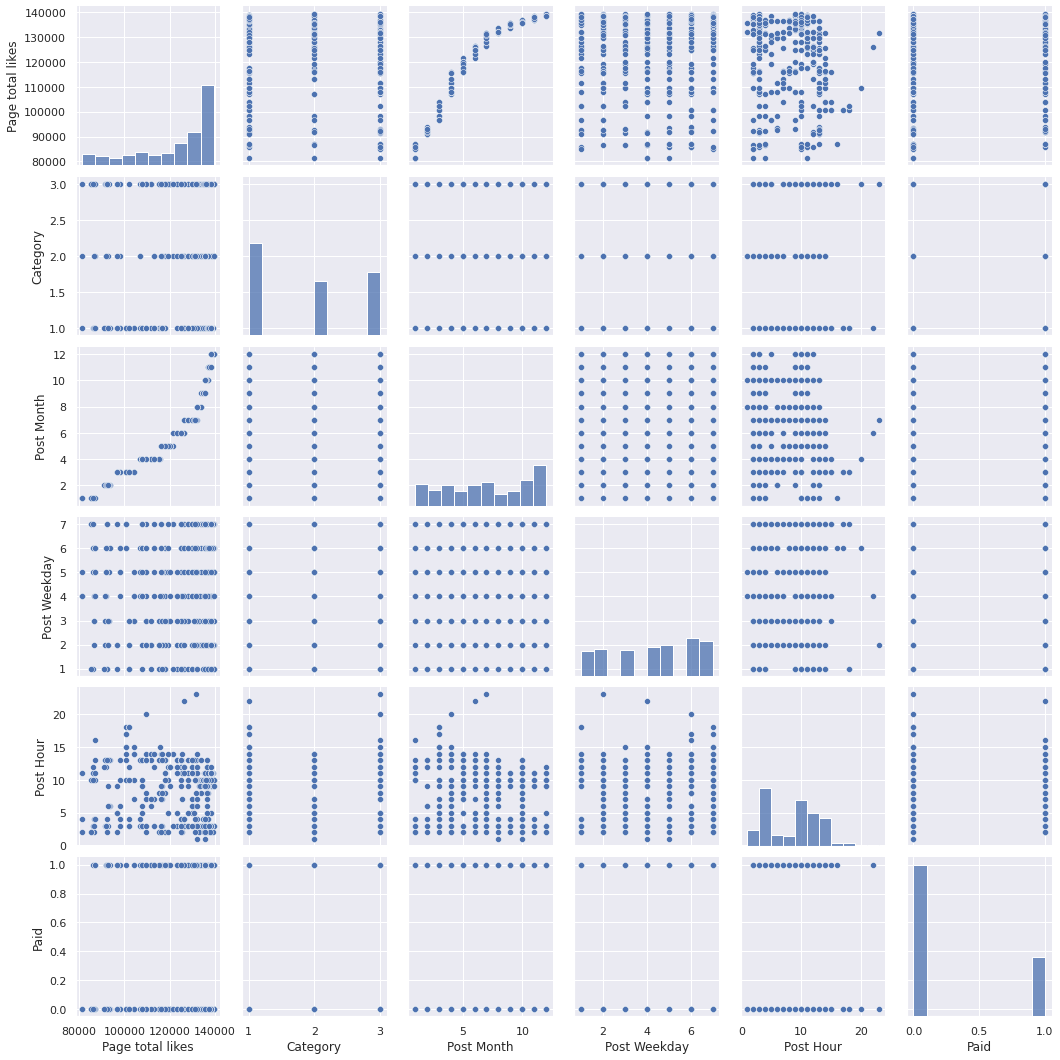

-------------------------------------


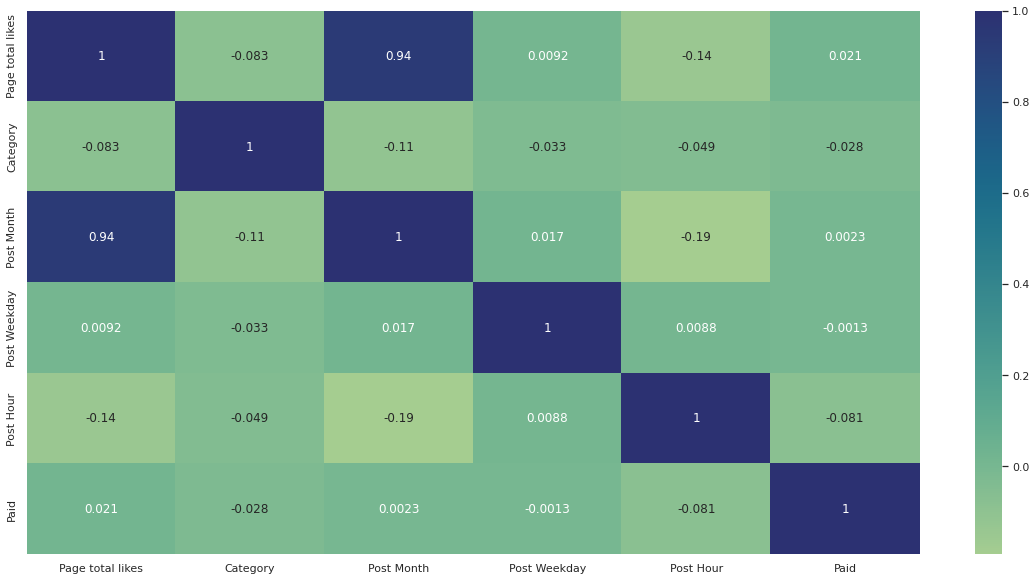

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Gráficando información 
Busca_Nulos(Xtv)
Visualiza_hist(Xtv,10)
Visualiza_histA(Xtv,10)
Visualiza_exploratorio(Xtv)
Visualiza_mapa_de_calor(Xtv)

In [ ]:
binary_cols = ['Paid']
discrete_cols = ['Page total likes']
category_cols = ['Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour']
binary_pipeline = Pipeline(steps=[('imp_most_f', SimpleImputer(strategy='most_frequent')),('one_hot', OneHotEncoder(handle_unknown="ignore", drop='first'))])
discrete_pipeline = Pipeline(steps=[('imp_most_f', SimpleImputer(strategy='most_frequent'))])
category_pipeline = Pipeline(steps=[('imp_most_f', SimpleImputer(strategy='most_frequent')),('one_hot', OneHotEncoder(handle_unknown="ignore", drop='first'))])
output_pipeline = Pipeline(steps=[('imp_most_f', SimpleImputer(strategy='most_frequent'))])
input_transform = ColumnTransformer(transformers=[('binary_pipeline', binary_pipeline, binary_cols),
                                                  ('discrete_pipeline', discrete_pipeline, discrete_cols),
                                                  ('category_pipeline', category_pipeline, category_cols)], remainder='passthrough')
output_transform = ColumnTransformer(transformers=[('output_pipeline', output_pipeline, ['LPE'])], remainder='passthrough')
output_transform_df = Pipeline(steps=[('output_transform', output_transform), ('np_to_df', FunctionTransformer(lambda x: pd.DataFrame(x, columns = ['LPE'])))])

#**Ejercicio-5.**
##Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la actividad. Consulta su documentación correspondiente: 
##https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html 



In [ ]:
input_a_transform = input_transform
output_a_transform = output_transform
Xtv_t = input_a_transform.fit_transform(Xtv)
ytv_t = output_a_transform.fit_transform(ytv).ravel()
Xtrain_t, Xval_t, ytrain_t, yval_t = train_test_split(Xtv_t, ytv_t, train_size=0.75)
print("Shape DummyRegression Training", Xtrain_t.shape)
print("Shape DummyRegression Validation", Xval_t.shape)

dummy_model = DummyRegressor()
dummy_model.fit(Xtrain_t, ytrain_t)
ytrain_pred = dummy_model.predict(Xtrain_t)
yval_pred = dummy_model.predict(Xval_t)
print('RMSE')
print(f'Training: {rmse_compute(ytrain_t, ytrain_pred)}')
print(f'Validation: {rmse_compute(yval_t, yval_pred)}')
print('MAE')
print(f'Training: {mae_compute(ytrain_t, ytrain_pred)}')
print(f'Validation: {mae_compute(yval_t, yval_pred)}')
print('MAPE')
print(f'Training: {mape_compute(ytrain_t, ytrain_pred)}')
print(f'Validation: {mape_compute(yval_t, yval_pred)}')


Shape DummyRegression Training (300, 45)
Shape DummyRegression Validation (100, 45)
RMSE
Training: 575.7501910454645
Validation: 662.5988854335462
MAE
Training: 355.111911111112
Validation: 428.8486666666665
MAPE
Training: 155.59671635413642
Validation: 116.14714680883424


#**Ejercicio-6.**
## Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada (RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de iteraciones para que todos los modelos converjan

In [ ]:
metricas = {'rmse': make_scorer(rmse_compute),
            'mae': make_scorer(mae_compute),
            'mape': make_scorer(mape_compute)}
nombres = ['Regresión Logística', 'Bosque Aleatorio', 'Perceptrón Multicapa']
modelos = [LogisticRegression(max_iter=1000), RandomForestClassifier(), MLPClassifier()]
kfold = RepeatedKFold(n_splits=8, n_repeats=3)
resultados_completos = []
nombres_completos = []
input_b_transform = input_transform
output_b_transform = output_transform
Xtv_model = input_b_transform.fit_transform(Xtv)
ytv_model = output_b_transform.fit_transform(ytv).ravel()
for modelo, nombre in zip(modelos, nombres):
    resultados = cross_validate(modelo, 
                                Xtv_model, 
                                ytv_model, 
                                scoring=metricas, 
                                cv=kfold, 
                                return_train_score=True)
    resultados_completos.append(resultados)
    for etapa in ['train', 'test']:
      if etapa == 'train':
        fase = 'Entrenamiento'
      else:
        fase = 'Validación'
      nombres_completos.append(f'{nombre}-{fase}')
      datos_actuales = [round(np.mean(resultados[f'{etapa}_rmse']), 4),
                        round(np.std(resultados[f'{etapa}_rmse']), 5), 
                        round(np.mean(resultados[f'{etapa}_mae']), 4),
                        round(np.std(resultados[f'{etapa}_mae']), 5),
                        round(np.mean(resultados[f'{etapa}_mape']), 4),
                        round(np.std(resultados[f'{etapa}_mape']), 5)]
      print(f'Resultados con el modelo {nombre} en la Fase de {fase}:')
      print(f'mean RMSE: {datos_actuales[0]}({datos_actuales[1]})')
      print(f'mean MAE: {datos_actuales[2]}({datos_actuales[3]})')
      print(f'mean MAPE: {datos_actuales[4]}({datos_actuales[5]})')
      print('--------------------------------------------')

Resultados con el modelo Regresión Logística en la Fase de Entrenamiento:
mean RMSE: 651.6485(29.77748)
mean MAE: 343.2923(15.82068)
mean MAPE: 84.1472(5.7385)
--------------------------------------------
Resultados con el modelo Regresión Logística en la Fase de Validación:
mean RMSE: 629.2106(169.68709)
mean MAE: 343.2758(72.42657)
mean MAPE: 84.0784(35.81005)
--------------------------------------------
Resultados con el modelo Bosque Aleatorio en la Fase de Entrenamiento:
mean RMSE: 47.8674(7.54156)
mean MAE: 4.1885(1.04561)
mean MAPE: 1.565(0.88057)
--------------------------------------------
Resultados con el modelo Bosque Aleatorio en la Fase de Validación:
mean RMSE: 681.9066(135.96128)
mean MAE: 394.6658(62.48266)
mean MAPE: 109.9076(42.85168)
--------------------------------------------
Resultados con el modelo Perceptrón Multicapa en la Fase de Entrenamiento:
mean RMSE: 782.4265(390.62675)
mean MAE: 552.7523(453.24231)
mean MAPE: 203.7394(230.72168)
------------------------

#**Ejercicio-7.**

## Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que encuentran los autores del artículo citado al inicio. Incluye tus conclusiones. 


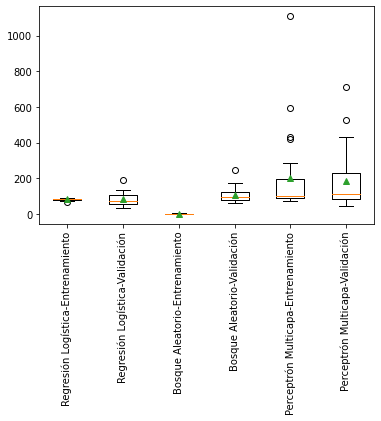

In [ ]:
mape_outputs = []
for resultado in resultados_completos:
  mape_outputs.append(resultado['train_mape'])
  mape_outputs.append(resultado['test_mape'])
plt.boxplot(mape_outputs, labels=nombres_completos, showmeans=True)
plt.xticks(rotation=90)
plt.show()

#**Ejercicio-8.**
## Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados. 


In [ ]:
mlp_dict_a = {'hidden_layer_sizes':[(60,), (90,), (115,)],
              'alpha':[0.001, 0.01, 0.1, 1],
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}
mlp_grid = GridSearchCV(MLPClassifier(),
                        param_grid = mlp_dict_a,
                        cv=kfold,
                        scoring = make_scorer(mape_compute, greater_is_better=False),
                        n_jobs=-1)
mlp_grid.fit(Xtv_model, ytv_model)
print(f'Mejor valor de exactitud obtenido con la mejor combinación: {mlp_grid.best_score_}')
print(f'Mejor combinación de valores encontrados de los hiperparámetros: {mlp_grid.best_params_}')
print(f'Métrica utilizada: {mlp_grid.scoring}')

Mejor valor de exactitud obtenido con la mejor combinación: -84.827424026377
Mejor combinación de valores encontrados de los hiperparámetros: {'alpha': 1, 'hidden_layer_sizes': (90,), 'learning_rate_init': 0.1}
Métrica utilizada: make_scorer(mape_compute, greater_is_better=False)


#**Ejercicio-9.**

##Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones. 


In [ ]:
None

#**Ejercicio-10.**
##Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras. 

In [ ]:
''' GridSearchCV for RandomForest '''
Xtv_model = input_b_transform.fit_transform(Xtv)
ytv_model = output_b_transform.fit_transform(ytv).ravel()

rf_dict = {'criterion':['gini', 'entropy'],
           'max_depth':[2, 3, 5, 10],
           'min_samples_split': [2, 4, 9, 13]}
rf_grid = GridSearchCV(RandomForestClassifier(),
                        param_grid = rf_dict,
                        cv=kfold,
                        scoring = make_scorer(mape_compute, greater_is_better=False),
                        n_jobs=-1)
rf_grid.fit(Xtv_model, ytv_model)
print(f'Mejor valor de exactitud obtenido con la mejor combinación: {rf_grid.best_score_}')
print(f'Mejor combinación de valores encontrados de los hiperparámetros: {rf_grid.best_params_}')
print(f'Métrica utilizada: {rf_grid.scoring}')

Mejor valor de exactitud obtenido con la mejor combinación: -90.51180334633064
Mejor combinación de valores encontrados de los hiperparámetros: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 9}
Métrica utilizada: make_scorer(mape_compute, greater_is_better=False)


#**Ejercicio-11.**

##11. Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras. 

In [ ]:
''' GridSearchCV for Logistic Regression '''
Xtv_model = input_b_transform.fit_transform(Xtv)
ytv_model = output_b_transform.fit_transform(ytv).ravel()

lr_dict = {'C': [0.0001,0.01,0.1,1.0,10.,100.],
                  'solver': ['saga', 'liblinear', 'newton-cg','lbfgs', 'sag'],
                  'class_weight': [None, 'balanced']}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000),
                       param_grid = lr_dict,
                       cv=kfold,
                       scoring = make_scorer(mape_compute, greater_is_better=False),
                       n_jobs=-1)

lr_grid.fit(Xtv_model, ytv_model)
print(f'Mejor valor de exactitud obtenido con la mejor combinación: {lr_grid.best_score_}')
print(f'Mejor combinación de valores encontrados de los hiperparámetros: {lr_grid.best_params_}')
print(f'Métrica utilizada: {lr_grid.scoring}')


#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**